In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize
from tabulate import tabulate
import matplotlib
from scipy.stats import norm
from scipy import stats
import scipy as sp


### ÚKOL 3

In [250]:
data = np.loadtxt('3.txt')
x = data[:, 0]
y = data[:, 1]

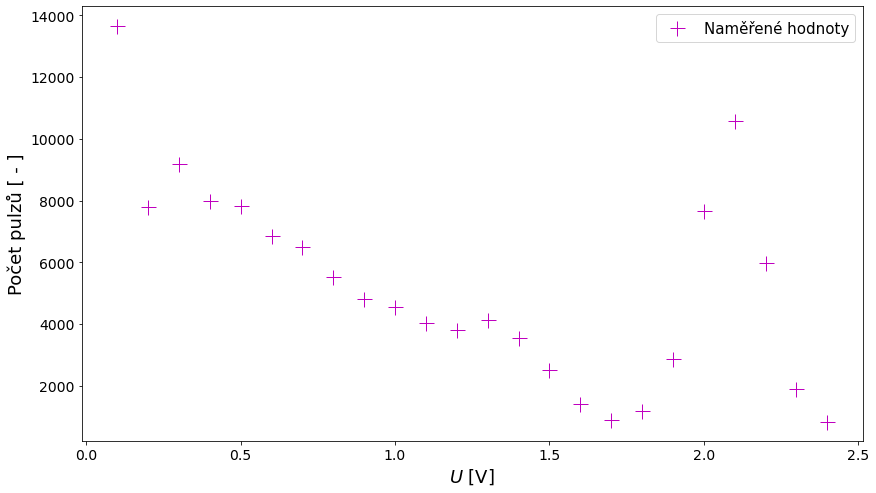

In [253]:
x_range_f = np.linspace(0, 2.5, 500)

plt.figure(figsize = (14,8))

plt.plot(x, y, '+', color = 'm', markersize=15, label = 'Naměřené hodnoty')

plt.legend(loc='upper right', fontsize=15)

#popisky os
plt.xlabel("$U$ [V]", fontsize=18)
plt.ylabel("Počet pulzů [ - ]", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.savefig('3.pdf')

plt.show()

### ÚKOL 4

In [272]:
data = np.loadtxt('4.txt')
d = data[:, 0]
I = data[:, 1]

dx = data[:, 2] 
dy = 0

In [268]:
def exp_fit(x, m, t, b):
    return m * np.exp(-t * x) + b

In [269]:
# perform the fit
p0 = (2000, .1, 50) # start with values near those we expect
params, err = scipy.optimize.curve_fit(exp_fit, d, I, p0)
m, t, b = params
m_err, t_err, b_err = np.sqrt(np.diag(err))



# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(popt))
sm = stdevs
st = stdevs

# determine quality of the fit
squaredDiffs = np.square(I - monoExp(d, m, t, b))
squaredDiffsFromMean = np.square(I - np.mean(I))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

#res = I - monoExp(d, *params)
#print('RES', res)

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")

print("m: {} +- {}".format(m,stdevs))
print("t: {} +- {}".format(t,st))

R² = 0.9889452344176444
Y = 162778.5750859702 * e^(-0.14726183742683616 * x) + 1862.849353291493
m: 162778.5750859702 +- [1.16693396e+04 2.60189488e-02 1.28452003e+04]
t: 0.14726183742683616 +- [1.16693396e+04 2.60189488e-02 1.28452003e+04]


In [270]:
def fit_funkce(x,a,b): ##definice linearni funkce, kterou se to pokusi fitnout, a je parametr, ktery bude menen pri fitovani
    return a*np.exp(-b*x)

params, cov = curve_fit(fit_funkce, d, I) #provede fit a najde optimallni hodnotu koeficientu a
a,b = params
fit_error = np.sqrt(np.diag(cov))
sa,sb = fit_error

print("a: {} +- {}".format(a,sa))
print("b: {} +- {}".format(b,sb))

a: 164337.10005532508 +- 4364.490823957312
b: 0.1437506706510395 +- 0.006803471461758182


/var/folders/km/0rbxj86x5db1pvk4n7h3dxlc0000gp/T/ipykernel_58837/2711005566.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)


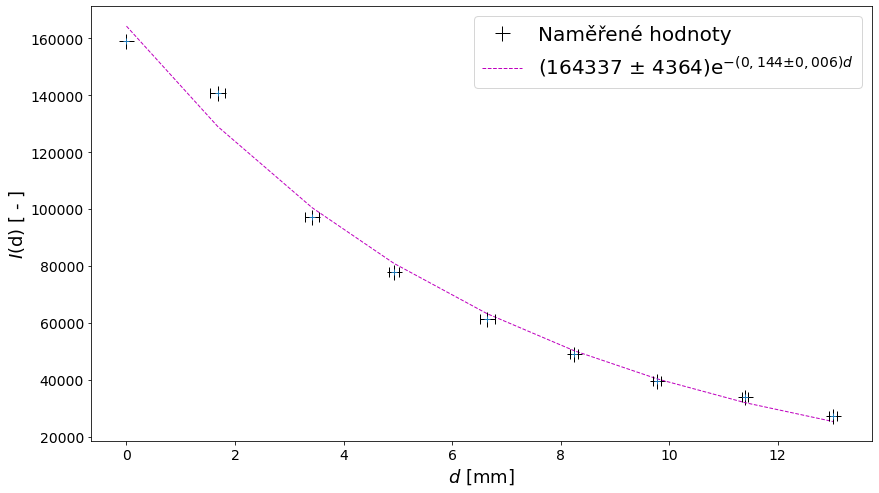

In [279]:
x_range_f = np.linspace(0, 13.5, 500)

plt.figure(figsize = (14,8))

plt.plot(d, I, '+', color = 'k', markersize=15, label = 'Naměřené hodnoty')
plt.plot(d, fit_funkce(d, a, b), color="m", linestyle='dashed', linewidth=1, label='(164337 \u00B1 4364)e$^{-(0,144 \u00B1 0,006)d}$')
plt.errorbar(d, I, yerr = dy, xerr = dx, fmt = '+', ecolor = 'k', elinewidth = 1, capsize = 5)


plt.legend(loc='upper right', fontsize=20)

#popisky os
plt.xlabel("$d$ [mm]", fontsize=18)
plt.ylabel("$I$(d) [ - ]", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig('4.pdf')

plt.show()

### ÚKOL 5

In [247]:
data = np.loadtxt('pozadi.txt')
x_p = data[:, 0]
y_p = data[:, 1]

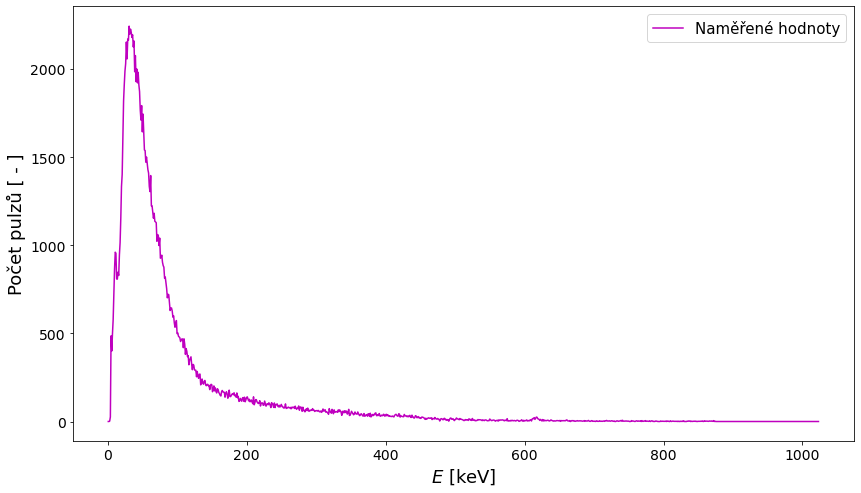

In [282]:
plt.figure(figsize = (14,8))

plt.plot(x_p, y_p,  color = 'm', markersize=15, label = 'Naměřené hodnoty')
#plt.fill_between(x_p, y_p, color = 'magenta', alpha=0.4)


plt.legend(loc='upper right', fontsize=15)

#popisky os
plt.xlabel("$E$ [keV]", fontsize=18)
plt.ylabel("Počet pulzů [ - ]", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.savefig('pozadi.pdf')

plt.show()

### ÚKOL 6

Cs

In [2]:
data = np.loadtxt('Cs.txt')
x_Cs = data[:, 0]
y_Cs = data[:, 1]

In [3]:
data = np.loadtxt('Cs_Gauss.txt')
x_CsG = data[:, 0]
y_CsG = data[:, 1]

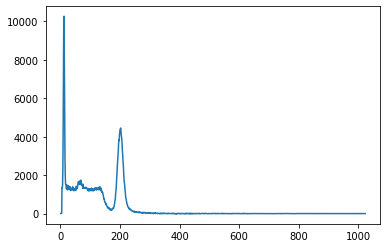

In [4]:
plt.plot(x_Cs,y_Cs)

In [5]:
def Gauss1(x, b, a, mu, sigma):
    return b + (a * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))) / sigma*np.sqrt(2*np.pi)

Pokus 0

[2.19045694e+02 1.48243466e+04 2.01182749e+02 8.94240454e+00]


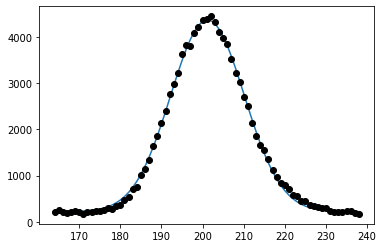

In [6]:
#estimate mean and standard deviation
mean = sum(x_CsG * y_CsG)
sigma = sum(y_CsG * (x_CsG )**2)
#do the fit!
popt, pcov = curve_fit(Gauss1, x_CsG, y_CsG, p0 = [10, 4000, 200, 50])
#plot the fit results
plt.plot(x_CsG, Gauss1(x_CsG, *popt))
#confront with the given data
plt.plot(x_CsG, y_CsG, 'ok')
print(popt)

Pokus 1

In [7]:
mu, sigma = norm.fit(x_CsG)
print(mu)
print(sigma)

201.0
21.64871050817269


Pokus 2

In [8]:
params, cov = curve_fit(Gauss1, x_CsG, y_CsG, p0 = [10, 4000, 200, 50]) #provede fit a najde optimallni hodnotu koeficientu a
b,a,mu,sigma = params
fit_error = np.sqrt(np.diag(cov))
sb,sa,smu,ssigma = fit_error

print("a: {} +- {}".format(a,sa))
print("b: {} +- {}".format(b,sb))
print("mu: {} +- {}".format(mu,smu))
print("sigma: {} +- {}".format(sigma,ssigma))

a: 14824.346595558362 +- 118.0178172229075
b: 219.0456939913803 +- 12.417139413654228
mu: 201.18274930149005 +- 0.04976338636183839
sigma: 8.94240453853964 +- 0.06246231198061821


In [22]:
popt, pcov = curve_fit(Gauss1, x_CsG, y_CsG, p0 = [10, 4000, 200, 50])
print (pcov)

[[ 1.54185351e+02 -1.16642149e+03  9.64368720e-06 -4.68759954e-01]
 [-1.16642149e+03  1.39282052e+04 -7.28012402e-05  5.59883361e+00]
 [ 9.64368720e-06 -7.28012402e-05  2.47639462e-03 -2.95554936e-08]
 [-4.68759954e-01  5.59883361e+00 -2.95554936e-08  3.90154042e-03]]


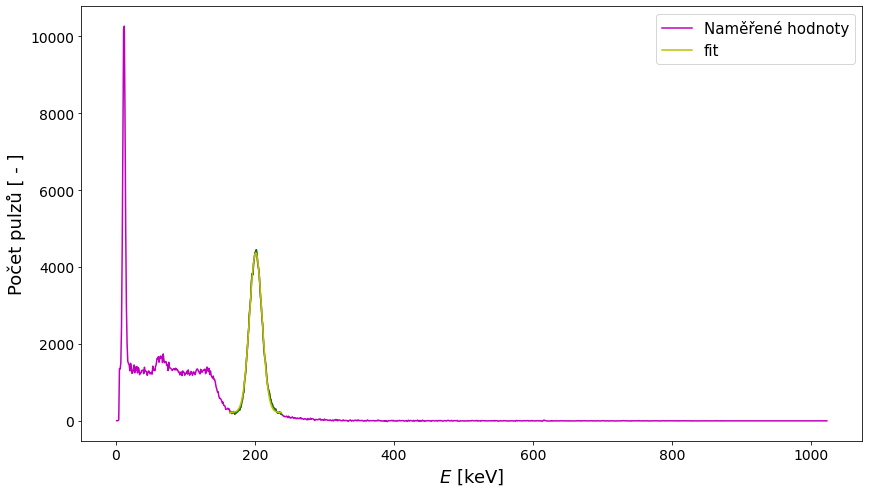

In [23]:
plt.figure(figsize = (14,8))

plt.plot(x_Cs, y_Cs,  color = 'm', markersize=15, label = 'Naměřené hodnoty')
#plt.fill_between(x_p, y_p, color = 'magenta', alpha=0.4)
plt.plot(x_CsG, y_CsG, color = 'g', markersize=15, label = '' )

plt.plot(x_CsG, Gauss1(x_CsG, b, a, mu, sigma), color = 'y', markersize=15, label = 'fit')

plt.legend(loc='upper right', fontsize=15)

#popisky os
plt.xlabel("$E$ [keV]", fontsize=18)
plt.ylabel("Počet pulzů [ - ]", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

Co

In [285]:
data = np.loadtxt('Co.txt')
x_Co = data[:, 0]
y_Co = data[:, 1]

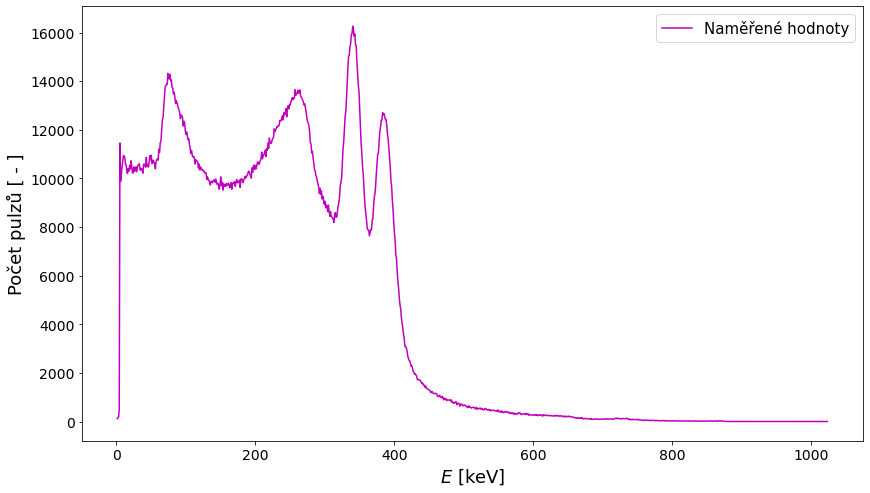

In [286]:
plt.figure(figsize = (14,8))

plt.plot(x_Co, y_Co,  color = 'm', markersize=15, label = 'Naměřené hodnoty')
#plt.fill_between(x_p, y_p, color = 'magenta', alpha=0.4)


plt.legend(loc='upper right', fontsize=15)

#popisky os
plt.xlabel("$E$ [keV]", fontsize=18)
plt.ylabel("Počet pulzů [ - ]", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.savefig('pozadi.pdf')

plt.show()

Am

In [287]:
data = np.loadtxt('Am.txt')
x_Am = data[:, 0]
y_Am = data[:, 1]

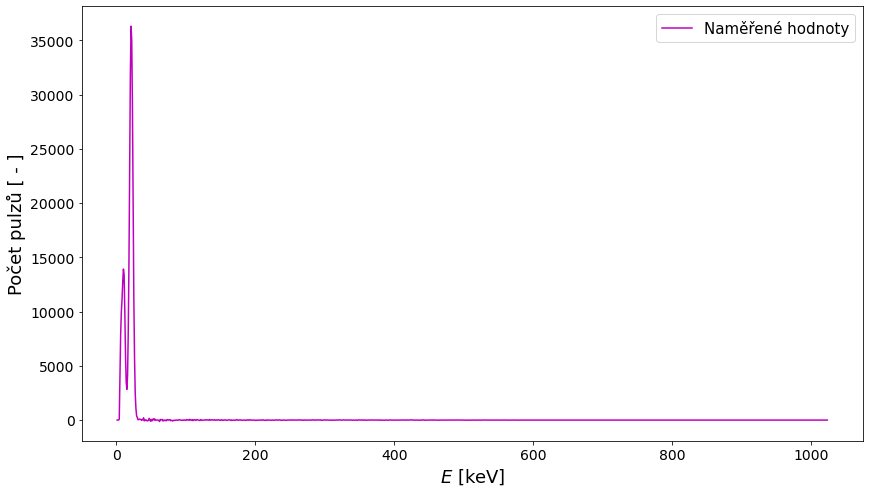

In [288]:
plt.figure(figsize = (14,8))

plt.plot(x_Am, y_Am,  color = 'm', markersize=15, label = 'Naměřené hodnoty')
#plt.fill_between(x_p, y_p, color = 'magenta', alpha=0.4)


plt.legend(loc='upper right', fontsize=15)

#popisky os
plt.xlabel("$E$ [keV]", fontsize=18)
plt.ylabel("Počet pulzů [ - ]", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.savefig('pozadi.pdf')

plt.show()

Ba

In [289]:
data = np.loadtxt('Ba.txt')
x_Ba = data[:, 0]
y_Ba = data[:, 1]

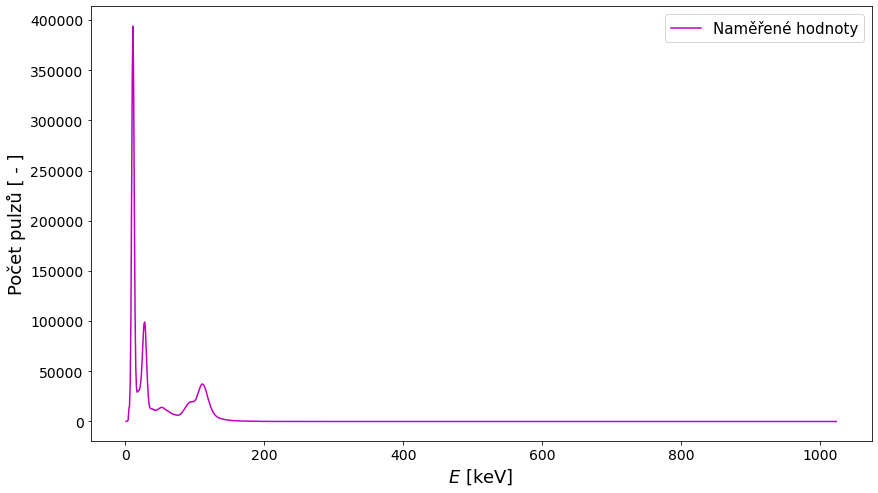

In [291]:
plt.figure(figsize = (14,8))

plt.plot(x_Ba, y_Ba,  color = 'm', markersize=15, label = 'Naměřené hodnoty')
#plt.fill_between(x_p, y_p, color = 'magenta', alpha=0.4)


plt.legend(loc='upper right', fontsize=15)

#popisky os
plt.xlabel("$E$ [keV]", fontsize=18)
plt.ylabel("Počet pulzů [ - ]", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.savefig('pozadi.pdf')

plt.show()